# Decision Tree Regression

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

## Importing and loading data

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data
cars_data = pd.read_csv('datasets/UsedCarsPrice.csv', index_col = 0, na_values = ['??', '????'])

# Check the data
cars_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [3]:
# Print the shape of the data
cars_data.shape

(1436, 10)

In [4]:
# Information about the data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


## Basic EDA and Statistics

In [5]:
# Check the count of missing values in each column
cars_data.isna().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

The attributes 'Age', 'Kilometers', 'FuelType', 'HP' and 'MetColor' have missing values

### Missing value imputation

In [6]:
# Filling the missing values with the relevant central statistics
cars_data['Age'].fillna(cars_data['Age'].mean(), inplace=True)
cars_data['KM'].fillna(cars_data['KM'].median(), inplace=True)
cars_data['HP'].fillna(cars_data['HP'].mean(), inplace=True)
cars_data['FuelType'].fillna(cars_data['FuelType'].mode()[0], inplace=True)
cars_data['MetColor'].fillna(cars_data['MetColor'].mode()[0], inplace=True)

# Check the data
cars_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


## Data Preprocessing

In [14]:
# Check the frequency of the Doors
cars_data['Doors'].value_counts()

Doors
5        673
3        621
4        137
2          2
three      1
four       1
five       1
Name: count, dtype: int64

In [7]:
# Replacing string values in `Doors` column with appropriate numerals and converting that column to numeric.
cars_data['Doors'].replace({'three': 3, 'four': 4, 'five':5}, inplace=True)
cars_data['Doors'] = cars_data['Doors'].astype(int)

cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int32  
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 117.8+ KB


In [8]:
# Applying One Hot encoding on the categorical attributes
cars_data = pd.get_dummies(cars_data, dtype = int, drop_first=True)

# Check the data
cars_data.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165,1,0
1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165,1,0
2,13950,24.0,41711.0,90.0,1.0,0,2000,3,1165,1,0
3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165,1,0
4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170,1,0


In [9]:
# Numerical Columns for Data Normalization / Transformation
from sklearn.preprocessing import MinMaxScaler

cnames = ['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']
sc = MinMaxScaler()

for col in cnames:
    cars_data[col] = sc.fit_transform(cars_data[col].values.reshape(-1,1))

cars_data.head(5)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,0.325044,0.278481,0.193355,0.170732,1.0,0,1.0,3,0.268293,1,0
1,0.333925,0.278481,0.300149,0.170732,1.0,0,1.0,3,0.268293,1,0
2,0.341030,0.291139,0.171647,0.170732,1.0,0,1.0,3,0.268293,1,0
3,0.376554,0.316456,0.197528,0.170732,0.0,0,1.0,3,0.268293,1,0
4,0.333925,0.367089,0.158433,0.170732,0.0,0,1.0,3,0.276423,1,0


In [10]:
# Splitting the target and independent variables
X = cars_data.drop('Price', axis = 1)
Y = cars_data['Price']

## Model Building

In [11]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

print(x_train.shape)
print(x_test.shape)

(1148, 10)
(288, 10)


Here, we are using a **Decision tree regressor**. It observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. 

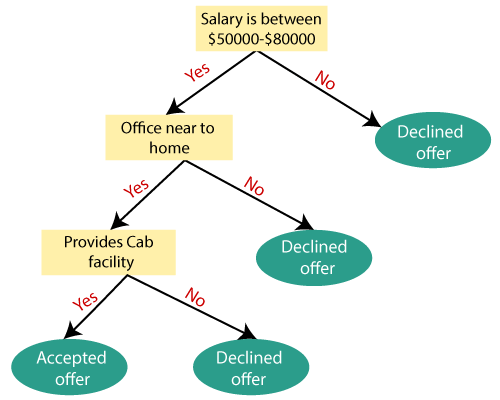

Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [12]:
# Creating an object of the type DecisionTreeRegressor
regressor = DecisionTreeRegressor()     
regressor = regressor.fit(x_train, y_train)

# Printing the columns
cols = list(x_train.columns.values)
print(cols)

['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol']


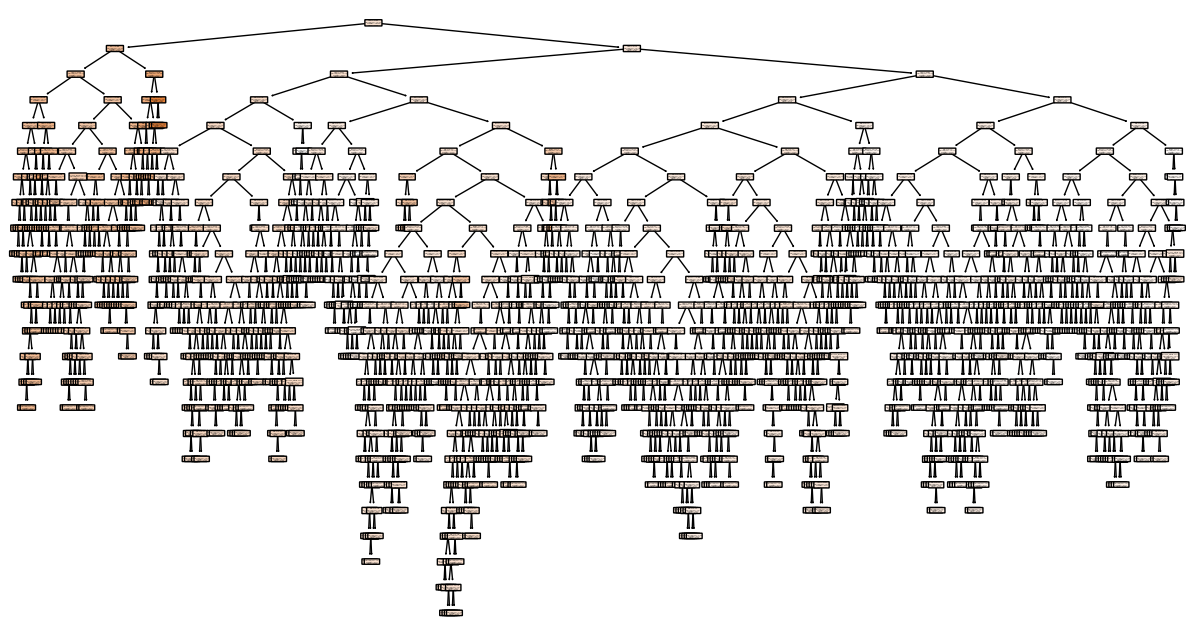

In [25]:
from sklearn import tree

# Plotting the tree
plt.figure(figsize=(15,8))
tree.plot_tree(regressor, feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True) 

plt.show()

In [26]:
# Display the tree rules
tree_rules = tree.export_text(regressor,  feature_names = cols)
print(tree_rules)

|--- Age <= 0.40
|   |--- HP <= 0.36
|   |   |--- Age <= 0.21
|   |   |   |--- Weight <= 0.20
|   |   |   |   |--- KM <= 0.10
|   |   |   |   |   |--- Weight <= 0.17
|   |   |   |   |   |   |--- HP <= 0.28
|   |   |   |   |   |   |   |--- KM <= 0.05
|   |   |   |   |   |   |   |   |--- Age <= 0.15
|   |   |   |   |   |   |   |   |   |--- value: [0.48]
|   |   |   |   |   |   |   |   |--- Age >  0.15
|   |   |   |   |   |   |   |   |   |--- value: [0.47]
|   |   |   |   |   |   |   |--- KM >  0.05
|   |   |   |   |   |   |   |   |--- value: [0.44]
|   |   |   |   |   |   |--- HP >  0.28
|   |   |   |   |   |   |   |--- Weight <= 0.14
|   |   |   |   |   |   |   |   |--- KM <= 0.03
|   |   |   |   |   |   |   |   |   |--- KM <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- value: [0.49]
|   |   |   |   |   |   |   |   |   |--- KM >  0.00
|   |   |   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |   |   |   |--- KM >  0.03
|   |   |   |   |   |   |   |   |   |--- 

In [15]:
# Calculate MAE, R2 Score and RMSE
y_train_pred = regressor.predict(x_train)
y_pred = regressor.predict(x_test)

print('Training R2-Score:', round(r2_score(y_train, y_train_pred), 3))
print('Testing R2-Score:', round(r2_score(y_test, y_pred), 3))
print('Root Mean Square Error:', round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))

Training R2-Score: 1.0
Testing R2-Score: 0.79
Root Mean Square Error: 0.062


In [16]:
# Which features are important for predictions? using feature_importances_ 
feat_imp = regressor.feature_importances_
print(feat_imp)

[7.99937375e-01 6.51338476e-02 4.90574414e-02 4.27066575e-03
 2.57686458e-03 1.17943121e-03 1.12294902e-02 6.54905220e-02
 8.51516911e-04 2.72845843e-04]


In [17]:
# Creating a dataframe to check the importance of every feature
pd.Series(feat_imp, index = cols).sort_values(ascending=False)

Age                0.799937
Weight             0.065491
KM                 0.065134
HP                 0.049057
Doors              0.011229
MetColor           0.004271
Automatic          0.002577
CC                 0.001179
FuelType_Diesel    0.000852
FuelType_Petrol    0.000273
dtype: float64